#Processamento inicial



### **Importar bibliotecas**

In [1]:
import nltk
import pandas as pd
import os
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from PIL import Image
%matplotlib inline

### **Leitura da base de reclamações**

In [3]:
data = pd.read_csv('base reclamações.csv',encoding='windows-1252',sep =';')
# verificação visual das 5 primeiras linhas
data.head()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
0,Sudeste,SP,ITAÚ UNIBANCO S/A,BANCO ITAÚ/BANCO UNIBANCO,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",Outros Contratos,"Contrato (não cumprimento, alteração, transfer...",entre 31 a 40 anos
1,Sudeste,SP,CLARO S/A,NET,NaN,Telefonia Fixa ( Plano de Expansão / Compra e ...,Contrato - Rescisão/alteração unilateral,mais de 70 anos
2,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,Energia Elétrica,PID - Pedido de Indenização por Danos Morais,entre 31 a 40 anos
3,Sudeste,SP,GNN GARAGENS LTDA - EPP,NETPARK.COM.BR,ESTACIONAMENTO DE VEÍCULOS,"Estacionamento ( Particular, Supermercado, Sho...","Vicio de qualidade (mal executado, inadequado,...",entre 31 a 40 anos
4,Sudeste,SP,CLARO S/A,CLARO / NET / EMBRATEL / CLAROTV,TELEFONIA MÓVEL CELULAR,Telefonia Fixa ( Plano de Expansão / Compra e ...,"Vicio de qualidade (mal executado, inadequado,...",entre 41 a 50 anos


In [4]:
# verificação visual das 5 últimas linhas
data.tail()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
42302,Sudeste,SP,B2W COMPANHIA DIGITAL,AMERICANAS.COM/SUBMARINO/SHOPTIME/SOUBARATO,COMÉRCIO VAREJISTA DE OUTROS PRODUTOS NÃO ESPE...,Microcomputador / Produtos de Informática,Não entrega/demora na entrega do produto,Nao Informada
42303,Sudeste,SP,ADIDAS DO BRASIL LTDA,ADIDAS.COM.BR,COMÉRCIO ATACADISTA DE CALÇADOS,Vestuário ( Calçado / Roupa ),Não entrega/demora na entrega do produto,entre 31 a 40 anos
42304,Sudeste,SP,RN COMERCIO VAREJISTA S/A,RICARDOELETRO.COM.BR/INSINUANTE.COM/ELETROSHOP...,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,"Acessório Para Vestuário ( Bolsa, Cinto, Chapé...",Produto entregue diferente do pedido,entre 21 a 30 anos
42305,Sudeste,SP,DECOLAR.COM LTDA,AGÊNCIA DECOLAR,AGÊNCIAS DE VIAGENS,Agências e Operadoras de viagens (pacotes turí...,Recusa injustificada em prestar serviço,Nao Informada
42306,Sudeste,SP,ESAB ESCOLA SUPERIOR ABERTA DO BRASIL LTDA,NaN,EDUCAÇÃO SUPERIOR - GRADUAÇÃO E PÓS-GRADUAÇÃO,"Escola ( Pré, 1º, 2º Graus e Superior )",Serviço não fornecido (entrega/instalação/não ...,entre 31 a 40 anos


### **Quantidade de linhas e colunas do DataFrame**

In [5]:
data.shape

(42307, 8)

In [6]:
data.columns

Index(['Regiao ', 'estado', 'empresa', 'subsidiaria  ', 'area ', 'serviço',
       'problema', 'faixa etarea'],
      dtype='object')

### **Localização das colunas com valores "null"**

In [7]:
data.isnull().sum()

Regiao              0
estado              0
empresa             1
subsidiaria      6530
area             5329
serviço             0
problema         8936
faixa etarea        0
dtype: int64

# Tratamento das empresas

### **Separação das colunas**

In [8]:
#Empresa
df_empresa = pd.DataFrame()
df_empresa['empresa'] = data['empresa']

In [9]:
# Estado
df_estado = pd.DataFrame()
df_estado['estado'] = data['estado']

In [10]:
# Serviço
df_serviço = pd.DataFrame()
df_serviço['serviço'] = data['serviço']

#### **Verificação se há algum "null"**

In [11]:
df_empresa.isnull().sum()

empresa    1
dtype: int64

In [13]:
df_estado.isnull().sum()

estado    0
dtype: int64

In [14]:
df_serviço.isnull().sum()

serviço    0
dtype: int64

#### **Remoção dos "nulls" encontrados**

In [15]:
df_empresa.dropna(inplace=True)
df_empresa.isnull().sum()

empresa    0
dtype: int64

#### **Verificação de missing values**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42307 entries, 0 to 42306
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Regiao         42307 non-null  object
 1   estado         42307 non-null  object
 2   empresa        42306 non-null  object
 3   subsidiaria    35777 non-null  object
 4   area           36978 non-null  object
 5   serviço        42307 non-null  object
 6   problema       33371 non-null  object
 7   faixa etarea   42307 non-null  object
dtypes: object(8)
memory usage: 2.6+ MB


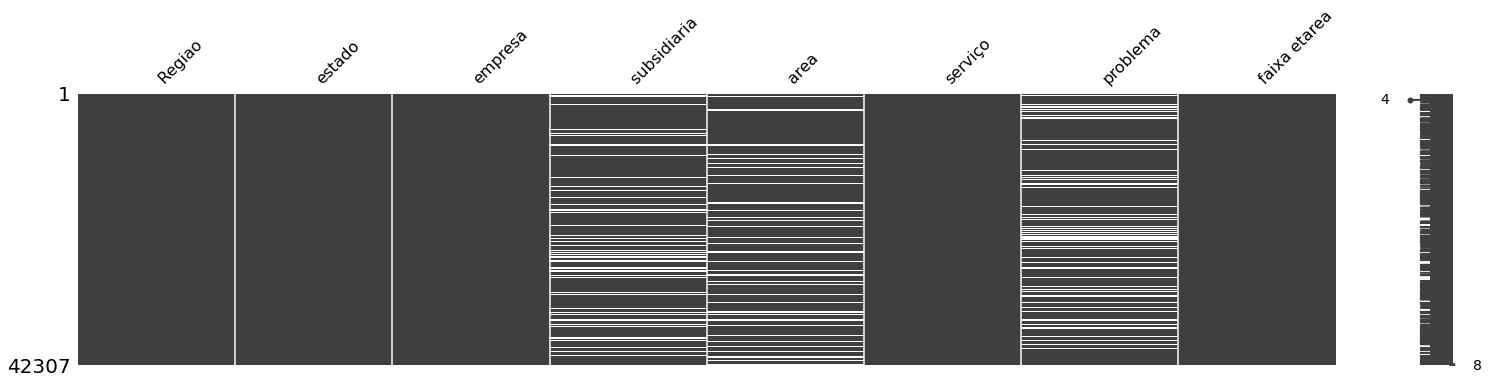

In [16]:
msno.matrix(data, figsize=(25,5));
data.info()

#### **Substitui:**

###### " " por "_" (espaço)
###### "/" por "" 
###### "," por "" 
###### "(" por "" 
###### ")" por "" 
###### "-" por ""
###### "." por ""
###### "\t" por "" (tab)


### **Para o wordcloud funcionar**

> **Empresas**



In [17]:
#Empresa
dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_empresa["Nome Empresa Sem Espaço"] = df_empresa.replace({'empresa': dicionario},regex=True)

In [18]:
#Converter o nome das empresas para letras minúsculas
df_empresa["Nome Empresa Sem Espaço"] = df_empresa["Nome Empresa Sem Espaço"].str.lower()

In [19]:
#Resultado obtido
print (df_empresa.groupby("Nome Empresa Sem Espaço").size().sort_values(ascending=False))

Nome Empresa Sem Espaço
telefonica_brasil_sa                                  1150
claro_sa                                              1125
tim_celular_sa                                         786
via_varejo_sa                                          516
eletropaulo_metropolitana_eletricidade_de_s_paulo      480
                                                      ... 
flynt_consultoria_comercial__eireli                      1
fls_educacional_consultoria_e_assessoria_em_inform       1
flp_comercial_de_medicamentos_ltda_me                    1
florismagno_dos_santos_cerqueira__me                     1
única_brasilia_automoveis_ltda_smaff_ford                1
Length: 10607, dtype: int64


In [20]:
#Criação de uma string única com todas as ocorrências dos nomes das empresas
string_empresas = " ".join([text for text in df_empresa["Nome Empresa Sem Espaço"]])

### **Geração do wordcloud das 40 empresas mais reclamadas**

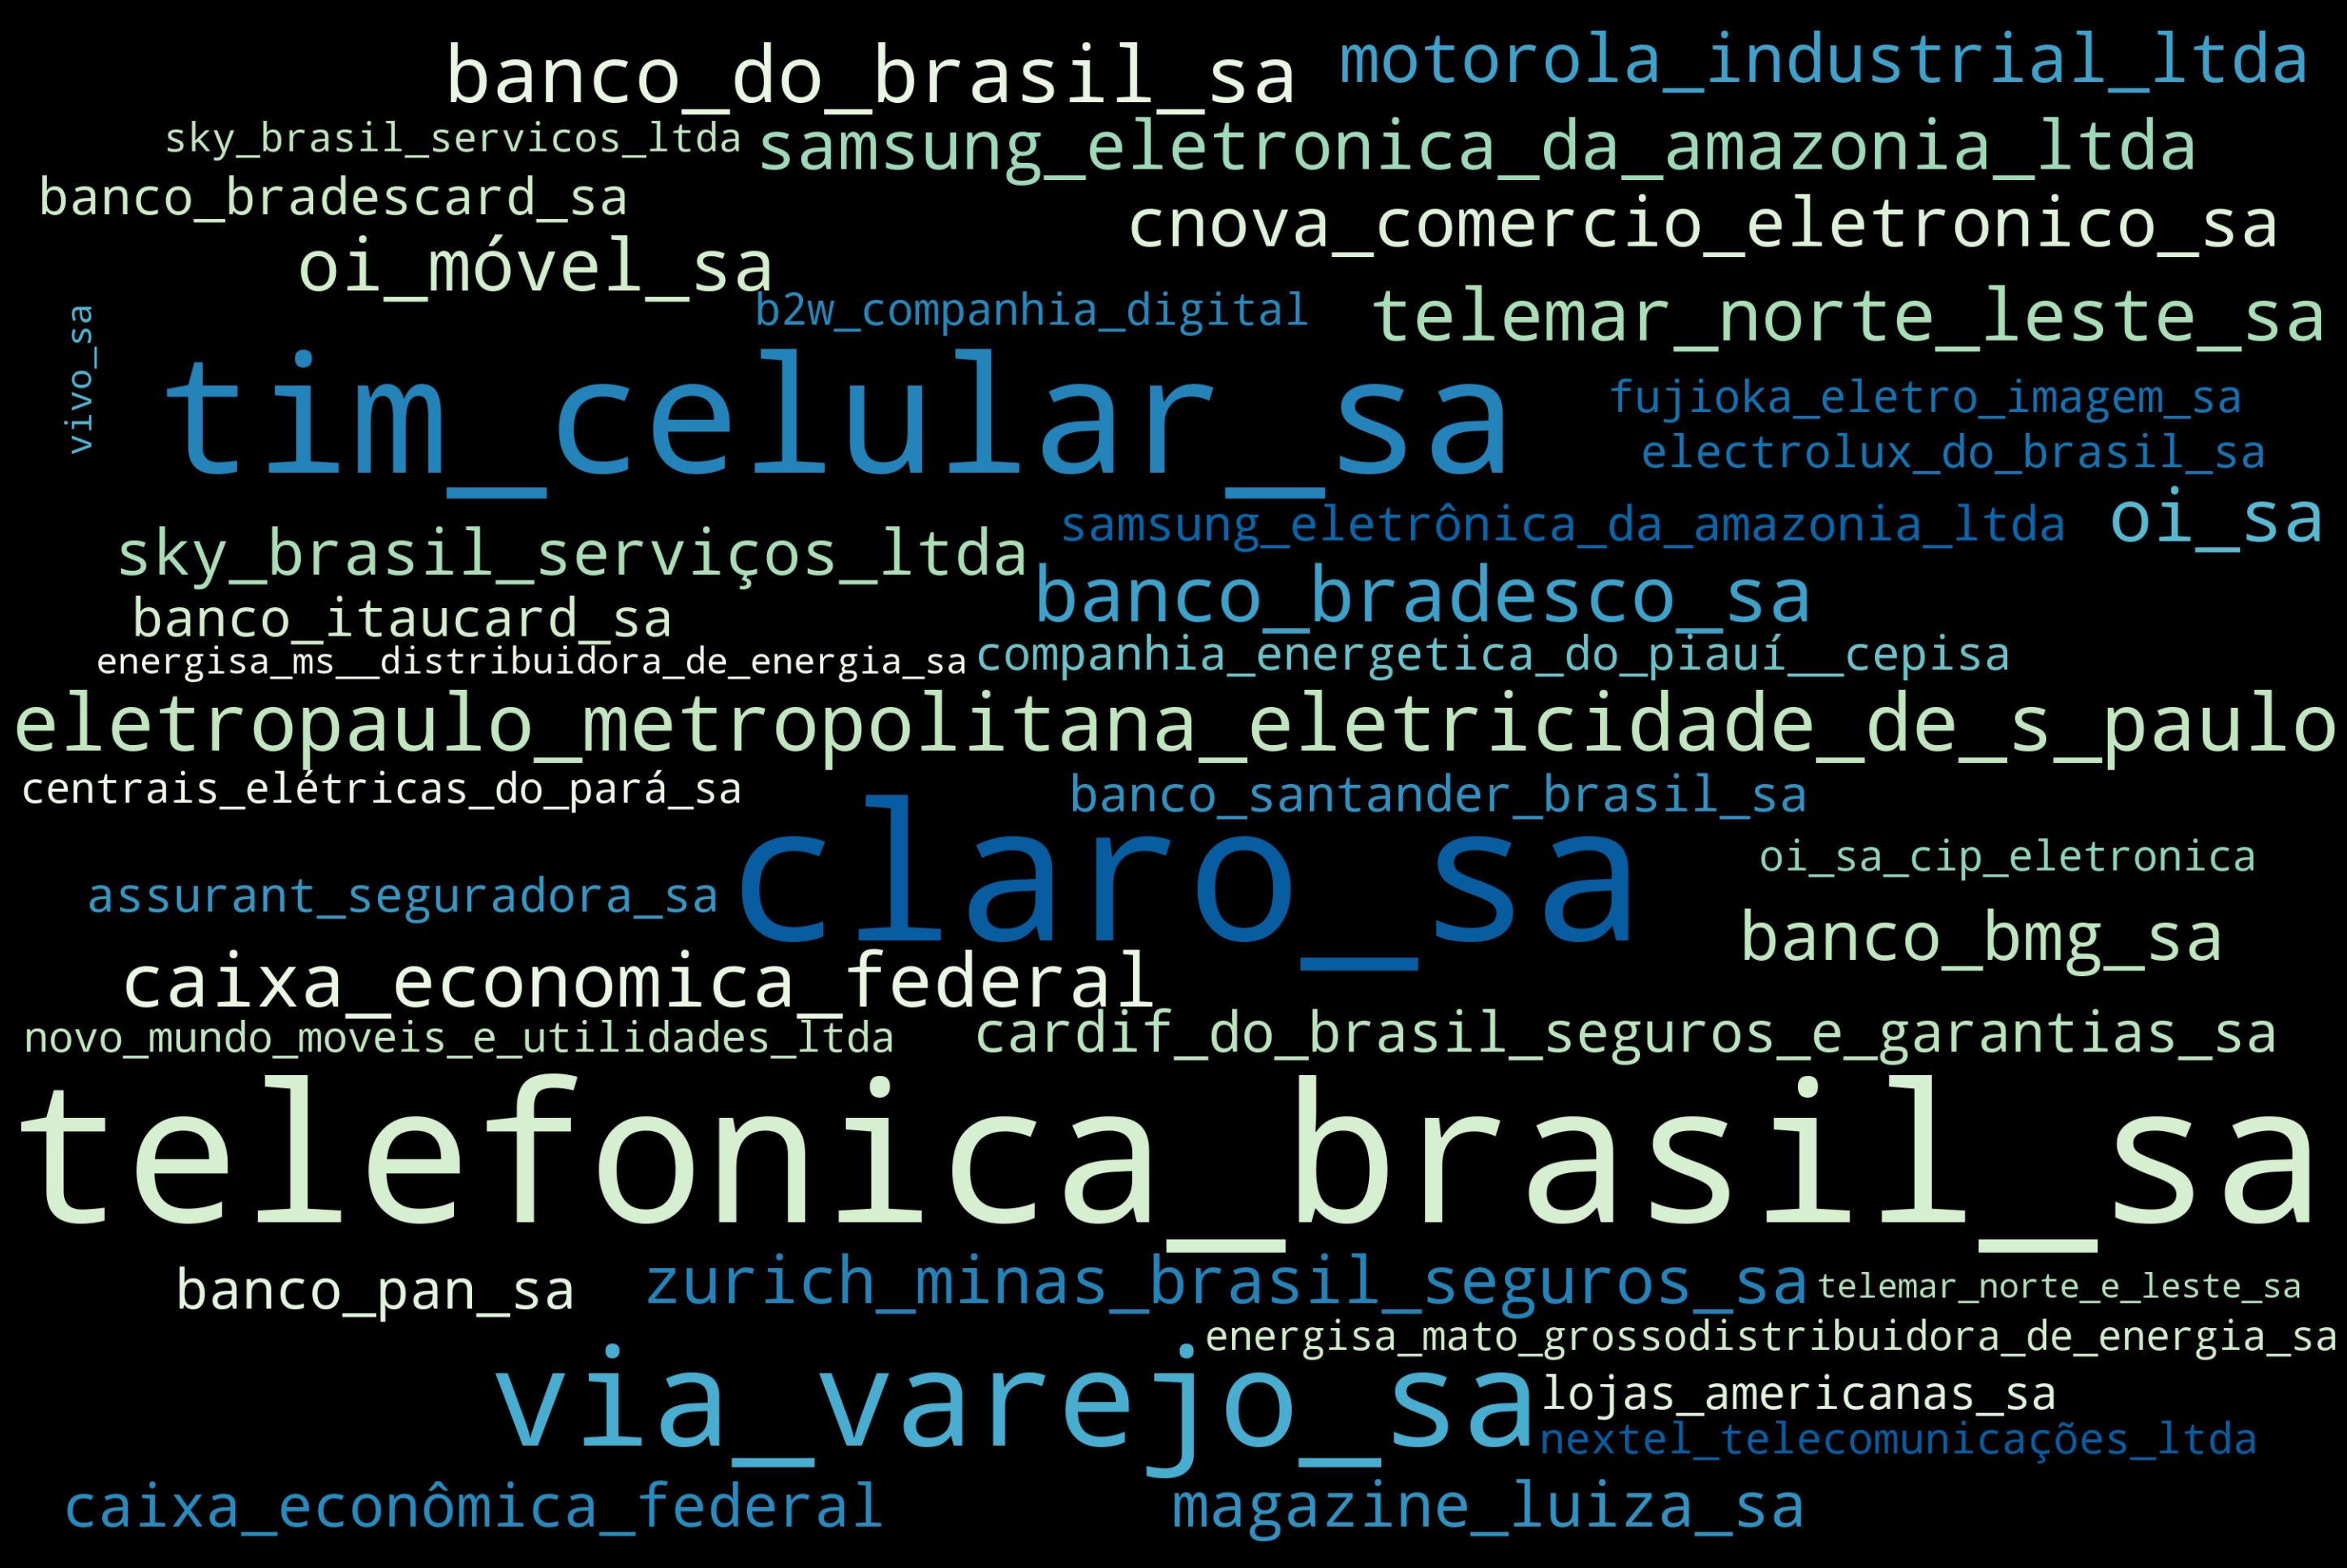

In [21]:
wordcloud_empresas = WordCloud(background_color="black",collocations=False,
                              colormap="GnBu",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=40
                             ).generate(string_empresas)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Empresa_wordcloud.png")
plt.show()

### **Wordcloud**

> **Estados**




In [22]:
#Estados
dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_estado["Nome Estado Sem Espaço"] = df_estado.replace({'estado': dicionario},regex=True)

In [23]:
#Converter o nome dos estados para letra minúscula
df_estado["Nome Estado Sem Espaço"] = df_estado["Nome Estado Sem Espaço"].str.lower()

In [24]:
#Resultado obtido
print (df_estado.groupby("Nome Estado Sem Espaço").size().sort_values(ascending=False))

Nome Estado Sem Espaço
sp    8127
go    7764
ms    4723
rn    4073
mt    3972
mg    3460
pi    2153
ro    2057
sc    1955
ce    1766
es     828
to     567
pa     341
pb     302
ma     126
rs      90
pe       3
dtype: int64


In [25]:
#Criação de uma string única com todas as ocorrências dos nomes dos estados
string_estado = " ".join([text for text in df_estado["Nome Estado Sem Espaço"]])

In [26]:
# Adicionando Imagem
maskCloud_estado= np.array(Image.open ('mapa1.jpg'))

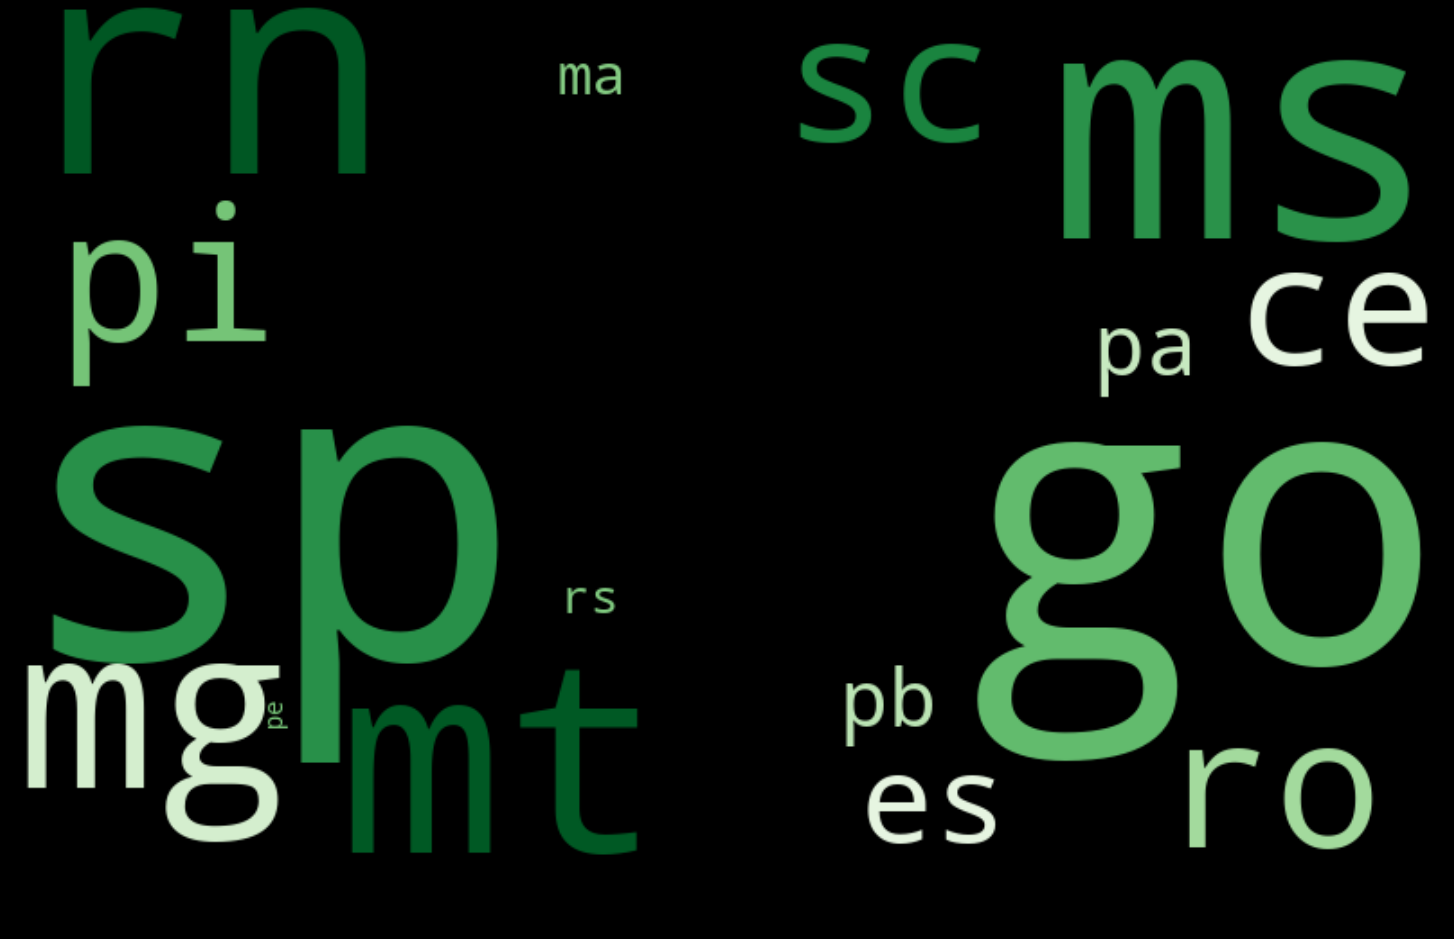

In [49]:
wordcloud_estado = WordCloud(background_color="black",collocations=False,
                              colormap="Greens",
                              width = 1000,
                              height = 1000,
                              max_font_size=500,
                              max_words=40, mask= maskCloud_estado,
                             ).generate(string_estado)
plt.figure(figsize = (20,15),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_estado, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0) 
plt.savefig("Estado_wordcloud.png")
plt.show()

### **Wordcloud**

> **Serviços**



In [28]:
#Serviços
dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_serviço["Nome Serviço Sem Espaço"] = df_serviço.replace({'serviço': dicionario},regex=True)

In [29]:
#Converter a lista de serviços para letra minúscula
df_serviço["Nome Serviço Sem Espaço"] = df_serviço["Nome Serviço Sem Espaço"].str.lower()

In [30]:
#Resultado obtido
print (df_serviço.groupby("Nome Serviço Sem Espaço").size().sort_values(ascending=False))

Nome Serviço Sem Espaço
telefone__convencional_celular_interfone_etc_                                                                        5149
telefonia_celular                                                                                                    3037
telefonia_fixa__plano_de_expansão__compra_e_venda__locação_                                                          2713
banco_comercial                                                                                                      2313
cartão_de_crédito                                                                                                    2274
                                                                                                                     ... 
profissional_liberal__veterinário                                                                                       1
charutaria__cigarro_tabaco_cachimbo_etc_                                                                                1


In [31]:
#Criação de uma string única com todas as ocorrências de serviços
string_serviço = " ".join([text for text in df_serviço["Nome Serviço Sem Espaço"]])

In [32]:
# Adicionando Imagem
maskCloud_serviço = np.array(Image.open ('bomba.jpg'))

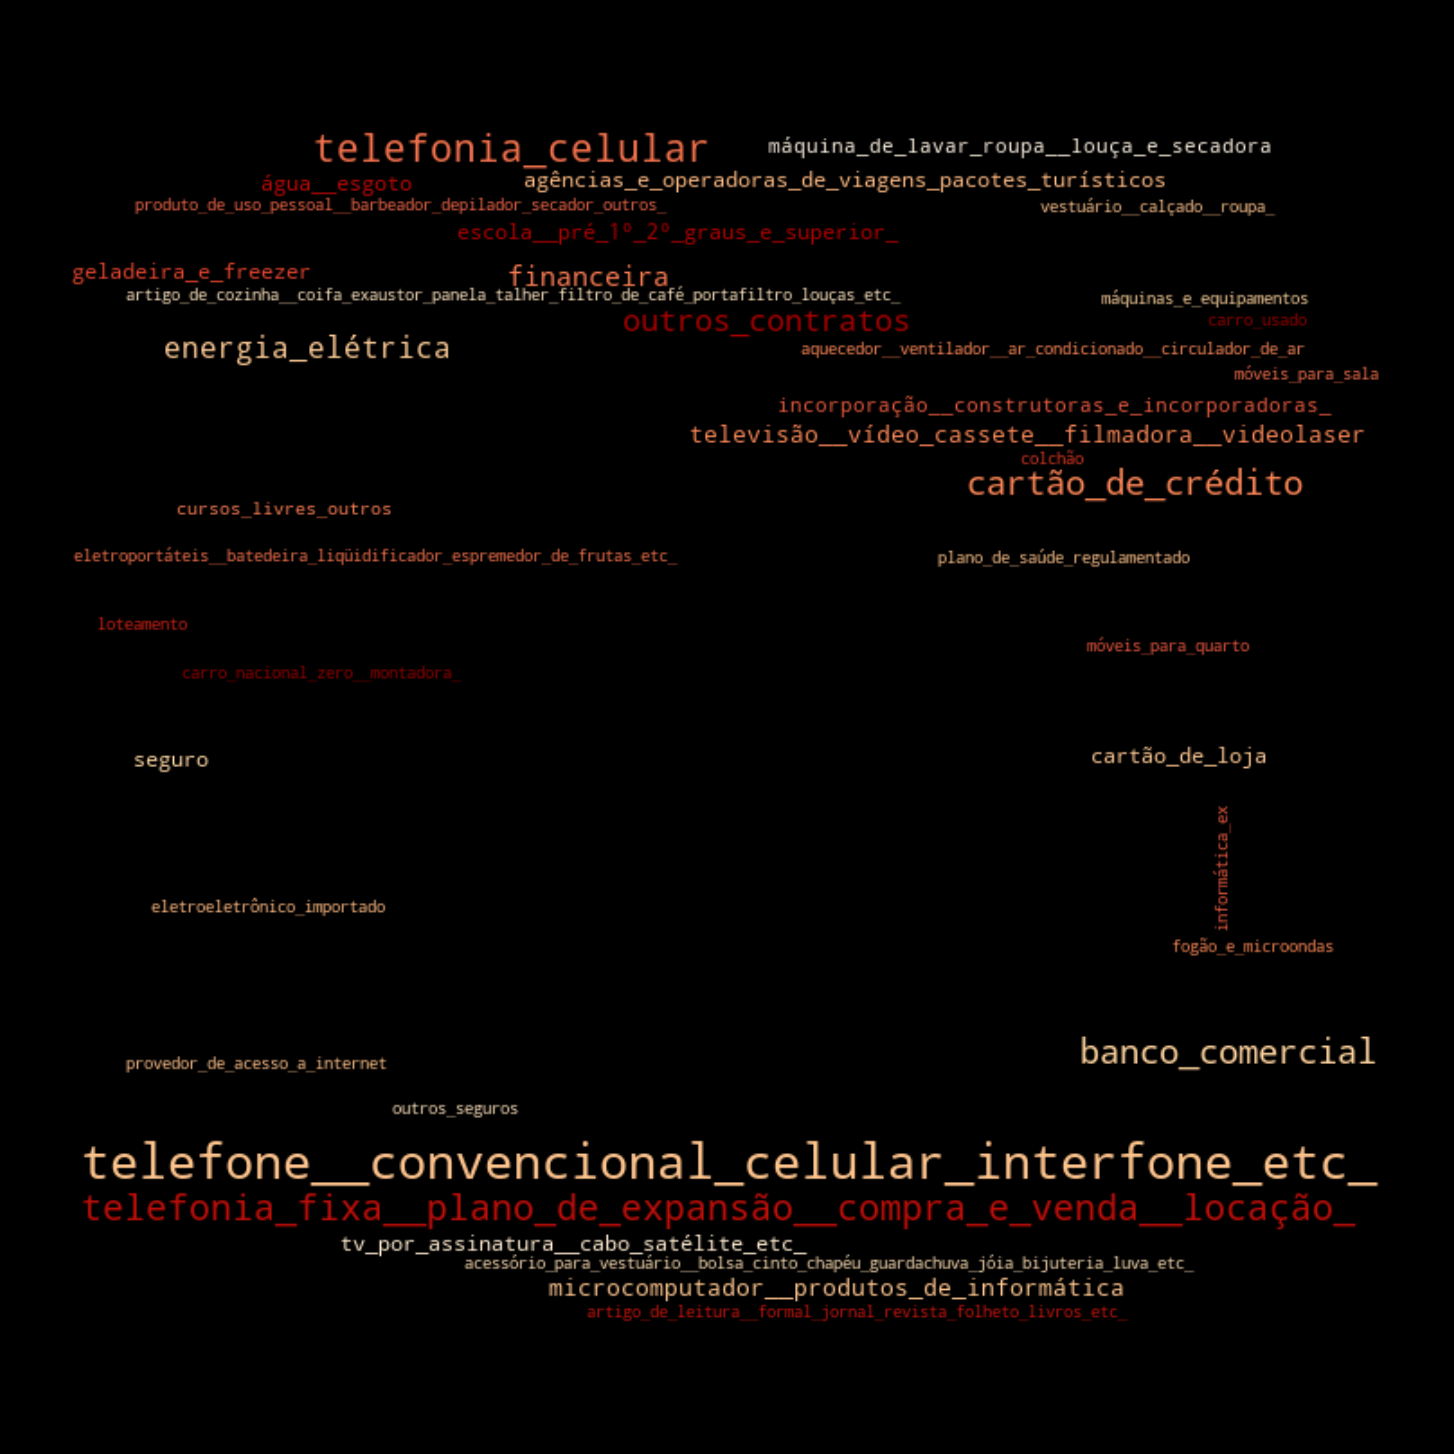

In [33]:
wordcloud_serviço = WordCloud(background_color="black",collocations=False,
                              colormap="OrRd",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=40,mask= maskCloud_serviço,
                             ).generate(string_serviço)
plt.figure(figsize = (20,25),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_serviço, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0) 
plt.savefig("Serviço_wordcloud.png")
plt.show()

### **Análise gráfica das empresas e estados com mais reclamações, e também os tipos de serviços mais reclamados**


In [79]:
#Empresas

def ordenar_resultado (data, coluna):
  return data.groupby(coluna).size().sort_values(ascending=False)

In [80]:
ranking_empresas= pd.DataFrame()
ranking_empresas= ordenar_resultado(df_empresa, 'Nome Empresa Sem Espaço')
ranking_empresas

Nome Empresa Sem Espaço
telefonica_brasil_sa                                  1150
claro_sa                                              1125
tim_celular_sa                                         786
via_varejo_sa                                          516
eletropaulo_metropolitana_eletricidade_de_s_paulo      480
                                                      ... 
flynt_consultoria_comercial__eireli                      1
fls_educacional_consultoria_e_assessoria_em_inform       1
flp_comercial_de_medicamentos_ltda_me                    1
florismagno_dos_santos_cerqueira__me                     1
única_brasilia_automoveis_ltda_smaff_ford                1
Length: 10607, dtype: int64

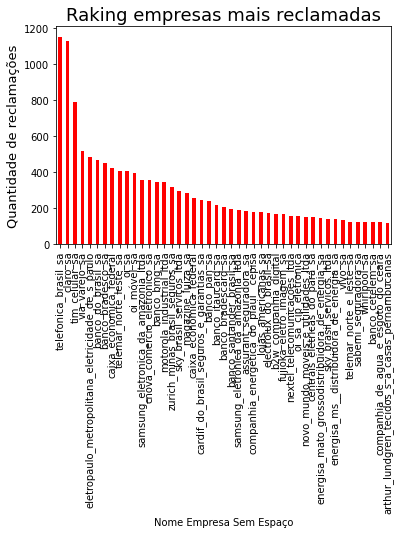

<Figure size 1440x504 with 0 Axes>

In [81]:
ranking_empresas.iloc[0:45].plot.bar(color=['red'])
plt.title('Raking empresas mais reclamadas',fontdict={'fontsize':18})
plt.ylabel('Quantidade de reclamações',fontdict={'fontsize':13})
plt.xticks(rotation='vertical')
plt.xticks(rotation=90)
plt.figure(figsize=(20,7))
plt.show()

In [82]:
#Estados

ranking_estados= pd.DataFrame()
ranking_estados= ordenar_resultado (df_estado, 'Nome Estado Sem Espaço',)
ranking_estados

Nome Estado Sem Espaço
sp    8127
go    7764
ms    4723
rn    4073
mt    3972
mg    3460
pi    2153
ro    2057
sc    1955
ce    1766
es     828
to     567
pa     341
pb     302
ma     126
rs      90
pe       3
dtype: int64

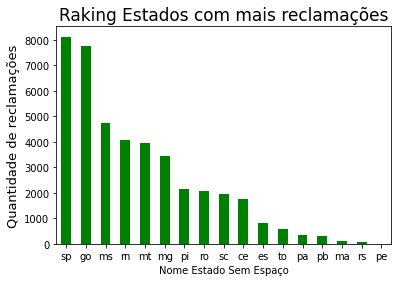

<Figure size 1440x360 with 0 Axes>

In [87]:
ranking_estados.iloc[0:40].plot.bar(color=['green'])
plt.title('Raking Estados com mais reclamações',fontdict={'fontsize':17})
plt.ylabel('Quantidade de reclamações',fontdict={'fontsize':13})
plt.xticks(rotation='vertical')
plt.xticks(rotation=0)
plt.figure(figsize=(20,5))
plt.show()

In [84]:
#Serviços
ranking_serviços= pd.DataFrame()
ranking_serviços= ordenar_resultado(df_serviço, 'Nome Serviço Sem Espaço',)
ranking_serviços

Nome Serviço Sem Espaço
telefone__convencional_celular_interfone_etc_                                                                        5149
telefonia_celular                                                                                                    3037
telefonia_fixa__plano_de_expansão__compra_e_venda__locação_                                                          2713
banco_comercial                                                                                                      2313
cartão_de_crédito                                                                                                    2274
                                                                                                                     ... 
profissional_liberal__veterinário                                                                                       1
charutaria__cigarro_tabaco_cachimbo_etc_                                                                                1


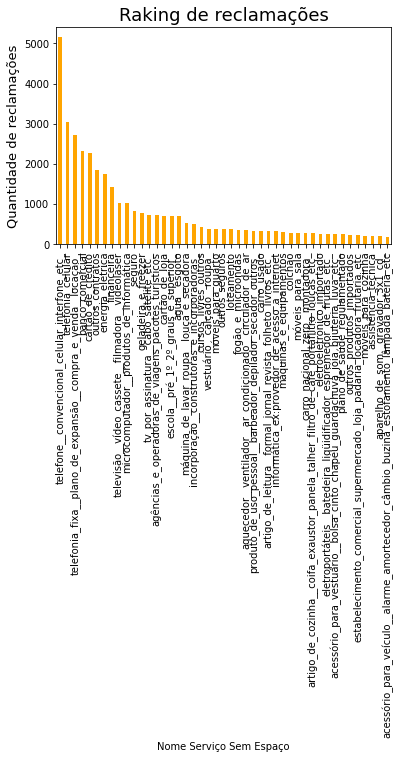

<Figure size 1440x504 with 0 Axes>

In [85]:
ranking_serviços.iloc[0:45].plot.bar(color=['orange'])
plt.title('Raking de reclamações',fontdict={'fontsize':18})
plt.ylabel('Quantidade de reclamações',fontdict={'fontsize':13})
plt.xticks(rotation='vertical')
plt.xticks(rotation=90)
plt.figure(figsize=(20,7))
plt.show()